###  Dataset Information

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.

Independent Variables:

Loan_ID

Gender

Married

Dependents

Education

Self_Employed

ApplicantIncome

CoapplicantIncome

Loan_Amount

Loan_Amount_Term

Credit History

Property_Area

Dependent Variable (Target Variable):

Loan_Status

### Loading Liberary

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder  # COnvert string data to into the numeric data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

### Loading the data set¶

In [99]:
df=df=pd.read_csv("LoanApplication.csv")

In [100]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [101]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [103]:
#find the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [104]:
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean(),inplace=True)
df["LoanAmount"].fillna(df["LoanAmount"].mean(),inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mean(),inplace=True)

In [105]:
# Fill the missing value for categorial term - Mode
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Gender"].mode()[0],inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)


In [106]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [107]:
# Creation of New attribute
df["Total_Income"]=df["ApplicantIncome"]+df["CoapplicantIncome"]


In [108]:
df.drop(columns=["CoapplicantIncome"],inplace=True)

In [110]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,141.000000,360.0,1.0,Urban,Y,6000.0


### EDA

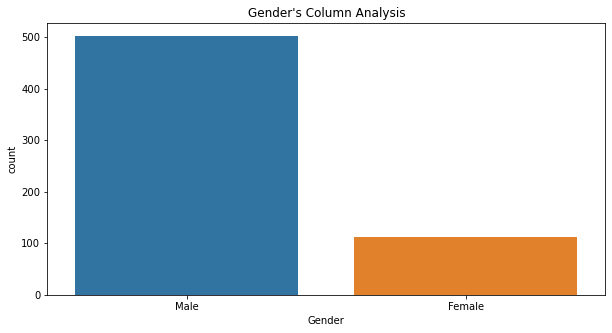

In [111]:
plt.figure(figsize=(10,5))
plt.title("Gender's Column Analysis")
sns.countplot(df["Gender"])

 We observed that most of the Married person apply for the loan.

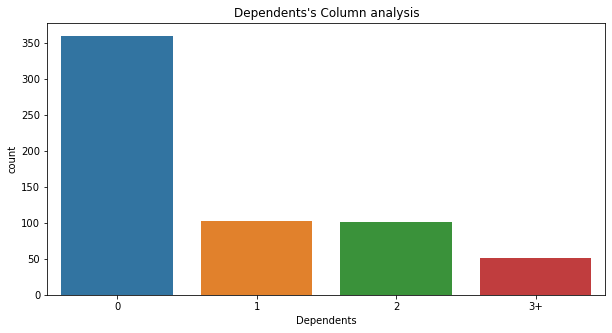

In [112]:
plt.figure(figsize=(10,5))
plt.title("Dependents's Column analysis")
sns.countplot(df["Dependents"])

Most of them are no dependent people who apply for the loan¶

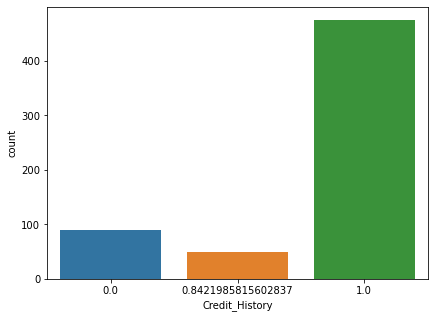

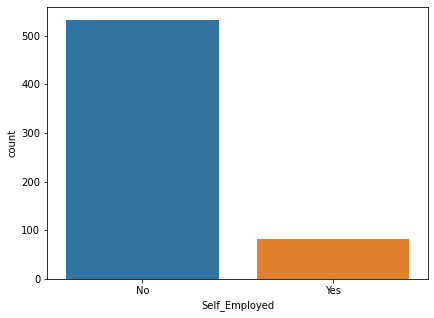

In [113]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df["Credit_History"])
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df["Self_Employed"])



We observed from the bar plot mostly people have credit history 1 and they are not self employed.

Text(0.5, 1.0, 'ApplicantIncome v/s Loan_status')

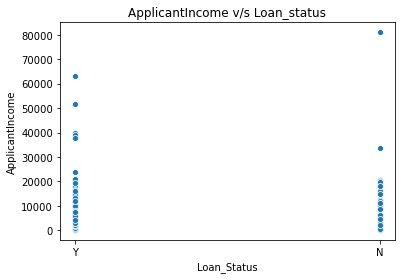

In [114]:
# Bivarrient Analysis
sns.scatterplot(y="ApplicantIncome",x="Loan_Status",data=df)
plt.title("ApplicantIncome v/s Loan_status")

We observed that from the scatterplot people who have income 10k to 20k are equal chances to passing or rejecting the loan but who have more then 40K mostly applicant loan is approved¶

Text(0.5, 1.0, 'Dependents v/s Loan_status')

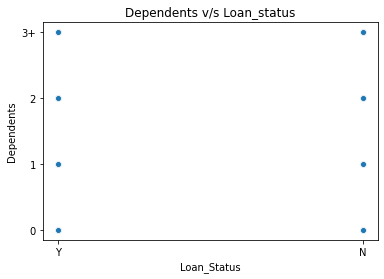

In [115]:
sns.scatterplot(y="Dependents",x="Loan_Status",data=df)
plt.title("Dependents v/s Loan_status")

We observed that graph is not well curved , show the skewness in the data set which is not to train the data. So we removed skewness in further steps

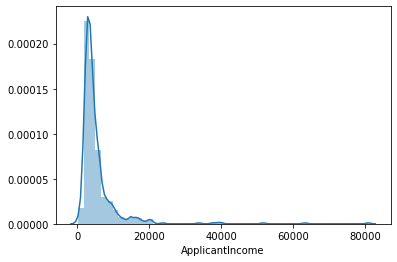

In [116]:
sns.distplot(df["ApplicantIncome"])

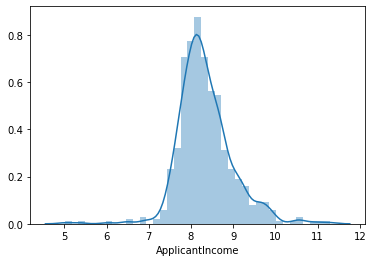

In [117]:
# Applied Log transform to the attribute
df["ApplicantIncome"]=np.log(df["ApplicantIncome"])
sns.distplot(df["ApplicantIncome"])

This is the good distribution to train our model

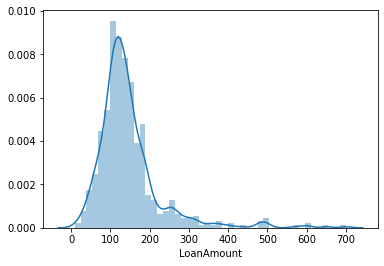

In [119]:
sns.distplot(df["LoanAmount"])

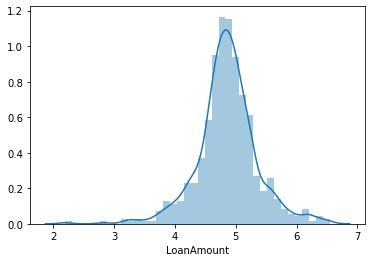

In [129]:
df["LoanAmount"]=np.log(df["LoanAmount"])
sns.distplot(df["LoanAmount"])


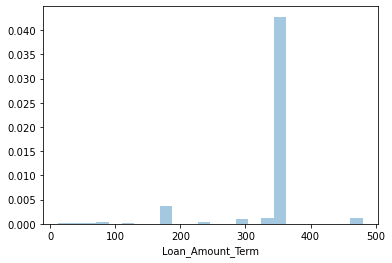

In [130]:
sns.distplot(df["Loan_Amount_Term"])

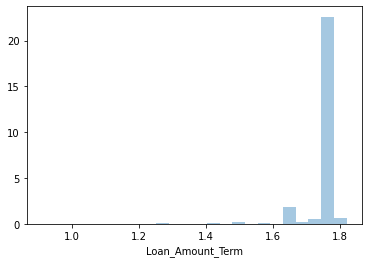

In [132]:
df["Loan_Amount_Term"]=np.log(df["Loan_Amount_Term"])
sns.distplot(df["Loan_Amount_Term"])


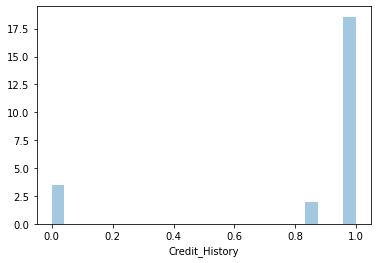

In [133]:
sns.distplot(df["Credit_History"])

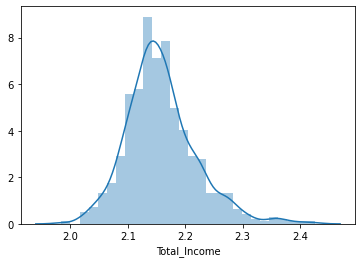

In [134]:
sns.distplot(df["Total_Income"])

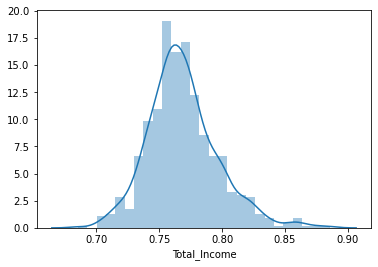

In [135]:
df["Total_Income"]=np.log(df["Total_Income"])
sns.distplot(df["Total_Income"])


In [136]:
from sklearn.preprocessing import LabelEncoder # Convert String data into the numeric value
encoded=LabelEncoder()
for column in df.columns:
    df[column]=encoded.fit_transform(df[column])
    

In [137]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,1,1,0,0,0,376,100,9,2,2,1,320
1,1,1,2,1,0,0,306,81,9,2,0,0,333
2,2,1,2,0,0,1,139,26,9,2,2,1,42
3,3,1,2,0,1,0,90,73,9,2,2,1,238
4,4,1,1,0,0,0,381,94,9,2,2,1,327
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,1,0,0,0,125,29,9,2,0,1,31
610,610,1,2,3,0,0,275,7,5,2,0,1,135
611,611,1,2,1,0,0,431,163,9,2,2,1,436
612,612,1,2,2,0,0,422,133,9,2,2,1,416


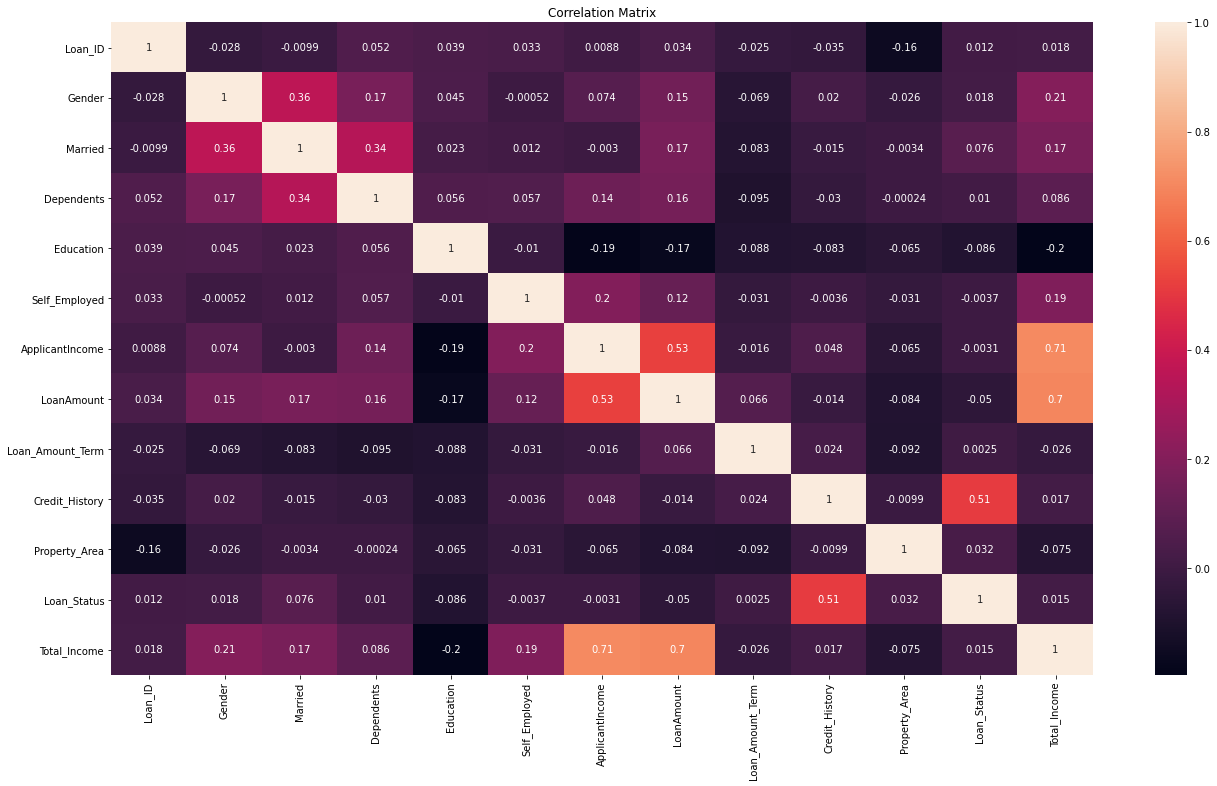

In [138]:
corr_mat=df.corr() # Example of multivarient analysis
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [140]:
x=df.drop(["Loan_Status"],axis=1)
y=df["Loan_Status"]

In [142]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is ",maxAccu,"on Random_state",maxRS)

Best Accuracy is  0.8648648648648649 on Random_state 158


In [143]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.7837837837837838
[[ 26  35]
 [  5 119]]
              precision    recall  f1-score   support

           0       0.84      0.43      0.57        61
           1       0.77      0.96      0.86       124

    accuracy                           0.78       185
   macro avg       0.81      0.69      0.71       185
weighted avg       0.79      0.78      0.76       185



In [144]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.7837837837837838
[[ 26  35]
 [  5 119]]
              precision    recall  f1-score   support

           0       0.84      0.43      0.57        61
           1       0.77      0.96      0.86       124

    accuracy                           0.78       185
   macro avg       0.81      0.69      0.71       185
weighted avg       0.79      0.78      0.76       185



In [145]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
preddt=rf.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,preddt))


0.7837837837837838
[[ 26  35]
 [  5 119]]
              precision    recall  f1-score   support

           0       0.86      0.41      0.56        61
           1       0.77      0.97      0.86       124

    accuracy                           0.78       185
   macro avg       0.82      0.69      0.71       185
weighted avg       0.80      0.78      0.76       185



In [146]:
# Creating parameter List to pass GridsearchCV
from sklearn.model_selection import GridSearchCV
parameters={"max_depth":np.arange(2,15),
           "criterion":["gini",'entropy']}

In [148]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [149]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [150]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [151]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [152]:
accuracy_score(y_test,GCV_pred)

0.7837837837837838

In [153]:
import joblib
joblib.dump(GCV.best_estimator_,"LoanPrediction")

['LoanPrediction']